# CASE STUDY SOLUTION 


In [3]:
# for data frame analysis
import pandas as pd 

# for mathematical operations
import numpy as np 

# imports below are for plotly 
import ipywidgets as widgets
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)   # for offline mode use
import plotly.figure_factory as ff
import plotly.offline as offline

# matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# For Normalizing data
from sklearn.preprocessing import StandardScaler

# For statistical test
import scipy.stats as stats

# Split data set into training and test set
from sklearn.model_selection import train_test_split as tts

# SVN module
from sklearn import svm

# Kernel Functions used 
from sklearn.metrics.pairwise import rbf_kernel,laplacian_kernel

# module for chi square test
from scipy.stats import chisquare





# Data Preprocessing 

In [4]:
# Import the dataset 
OutputData = pd.read_excel('OutputDATA.xlsx') 

In [5]:
# view the dataset using plotly for good visualization
df = ff.create_table(OutputData.head())
offline.iplot(df)


In [6]:
 # view the column names
OutputData.columns

Index(['Compounds / Bio Sensors', 'BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6',
       'BS7', 'BS8', 'BS9', 'BS10', 'BS11', 'BS12'],
      dtype='object')

In [7]:
# rename the columns compound/sensors to compounds .
# Since this column carries the identity of the compounds
OutputData.rename(columns = {'Compounds / Bio Sensors':'Compounds'}, inplace = True)

In [8]:
# view the changes
df = ff.create_table(OutputData.head())
offline.iplot(df)

In [9]:
# Get information about the data frame 
# There are null values 
# Especially for the column compunds
OutputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
Compounds    24 non-null object
BS1          48 non-null float64
BS2          48 non-null float64
BS3          48 non-null float64
BS4          48 non-null float64
BS5          48 non-null float64
BS6          48 non-null float64
BS7          48 non-null float64
BS8          48 non-null float64
BS9          48 non-null float64
BS10         48 non-null float64
BS11         48 non-null float64
BS12         48 non-null float64
dtypes: float64(12), object(1)
memory usage: 5.6+ KB


In [10]:
# Get the shape of the  data set 
OutputData.shape

(54, 13)

From case study  we know that we took 2 readings for each comppound. The rows with all Nan
are empty rows from the excel sheet. Lets get rid of this first.

In [11]:
# drop rows having all its values as Nan
# Use inplace=true to return the data set with Nan rows removed 
OutputData.dropna(how='all',inplace = True )

In [12]:
# we observe that since some rows were dropped the 
# row index is no longer step wise
OutputData.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 16, 17, 18,
            19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37,
            39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53],
           dtype='int64')

In [13]:
# reset index . SO the index is step wise
OutputData.reset_index(drop=True,inplace = True)
OutputData.index

RangeIndex(start=0, stop=48, step=1)

In [14]:
df = ff.create_table(OutputData.head())
offline.iplot(df) # view data set to confirm changes has been made

In [15]:
OutputData.shape # the shape has reduced since we removed some rows

(48, 13)

In [16]:
# In this snippet we loop through the index
# we check if the column Compound is a null value
# We replace null value with previous value 
# This means since compound A is read twice the first reading is entered as A
# However the second reading is read as Nan under the column compound. Thus we let the first and second reading 
# be same, ie A for example, 
for i in  OutputData.index:
    if pd.isnull(OutputData.loc[i, 'Compounds']) == True :
        OutputData.loc[i, 'Compounds'] = OutputData.loc[i-1, 'Compounds']

In [17]:
df = ff.create_table(OutputData.head())
offline.iplot(df)

In [18]:
# Using the describe command on the data frame we get the following.
OutputData.describe()

,BS1,BS2,BS3,BS4,BS5,BS6,BS7,BS8,BS9,BS10,BS11,BS12
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3349.229167,2869.395833,1737.416667,1669.479167,2045.375000,1559.729167,4384.291667,2758.687500,1660.750000,11136.708333,5126.708333,1660.562500
std,4365.334299,3870.475141,760.405290,684.348611,902.914916,705.947673,3878.867459,924.637782,667.051579,11075.171002,3517.436699,530.291767
min,531.000000,543.000000,553.000000,520.000000,470.000000,496.000000,687.000000,1008.000000,517.000000,541.000000,560.000000,517.000000
25%,1179.000000,1331.500000,1237.750000,1213.250000,1290.250000,1214.250000,2324.500000,2200.500000,1258.500000,2265.250000,2343.750000,1388.000000
50%,1983.000000,1713.000000,1566.500000,1598.000000,1850.000000,1398.500000,3231.000000,2629.000000,1500.500000,4379.500000,3913.500000,1650.000000
75%,3323.000000,2479.500000,2144.250000,1894.500000,2465.250000,1622.500000,4110.000000,3203.000000,1894.250000,22497.250000,7164.000000,1804.000000
max,23694.000000,24118.000000,3910.000000,3594.000000,4100.000000,4073.000000,21887.000000,5461.000000,3338.000000,38179.000000,13460.000000,3395.000000


As can be obsrved from the output above. Certain sensors have very high max value which means they are very sensitive to certain compunds and can reliable detect those compounds. Howeve, the min for each sensor is within the same range. This might imply taht at certain point or the other each sensor might have not been sensitive to certain compound (maybe). But it might also be the case that the readings came low for all sensors so that low values were reported for all. We still need the dig deeper.

In [19]:
def linePlot(OutputData):
    '''
    Input : Data Frame
    Output: list containing data plots for each column
    
    This is to be used for line plot in plotly
    
    '''
    data = [] # list to store data set
    
    for i in OutputData.columns: # loop through columns
        
        if i != 'Compounds': # skip the column with name Compounds. Since it is the x axis
            temp = 'trace' + i # name for the data points of column i if column i != 'Compounds'
            temp = go.Scatter(  # make a scatter points for plotly
            x = OutputData.Compounds, # The x-axis
            y = OutputData[i], # the y acis
            mode = 'lines+markers', # markers
            name = i # name for the line
            )
        
            data.append(temp) # store in the list named data
    
    # layout for the plot
    layout = go.Layout( 
        title = 'Line Plot for Readings',
        yaxis = dict(
        title = 'Signal Values'
        ),
        xaxis = dict(
        title = 'Compounds'
        )
    
    )
    return data, layout

data, layout = linePlot(OutputData)
fig = go.Figure(data=data,layout =layout)

offline.iplot(fig)

NOTE : First, as can be observed in the plot above BS10 seem to perform relatively well in detecting the compounds. Also we can distinctively see that compounds F to K are not  recorded quite well by any of the sensors: so these compouds will be the major bottleneck in this prediction model. In addition, some sensors seem to have low values across all readings eg BS9.
<p> secondly, a desirable property for detecting compounds in that "dynamic differences or range" across different sensor readings and not absolute values. By this it is meant that if BS10 should predict compound A( and most other compounds as seen above) with high signal value then there should be sensors BS_X and BS_Y for whcih compound A is detected with high signal for BS_X and low value for BS_Y. This implies that since BS10 is high across several compound signal values, so it might not be sufficient  alone in making a decsion rule as to whether an unknown compound could be A or B</p>
<p> Using information theoretic terminology, it is means that BS10 has low entropy or "less surprise". Since, apriori we know it will produce high signal values relatively across readings. However, knowing that signal  value of BS_X (an arbitrary sensor)  for compound A  is high gives better or high information content  -- since BS_X can be assumed to be particularly  more discriminating against compound A (report high values for A) while having relatively low values in others for example. </p>

In [20]:

def StackedHistoPLot(OutputData):
    '''
    Input : Data Frame
    Output: list containing data plots for each column
    
    This is to be used for line plot in plotly
    
    '''
    data = [] # list to store data set
    names = [] # list to store names
    
    for i in OutputData.columns: # loop through columns
        
        if i != 'Compounds': # skip the column with name Compounds. Since it is the x axis
            temp = 'trace' + i # name for the data points of column i if column i != 'Compounds'
            temp = go.Histogram(  # make a scatter points for plotly
            
            y = OutputData[i], # the y acis
             name = i
            
            )
        
            data.append(temp) # store in the list named data
            names.append(i )# name for the lin
    return data

data = StackedHistoPLot(OutputData)
layout = go.Layout(barmode='stack', title = 'Histogram plot for Readings', xaxis = dict(
        title = 'Frequency'
        ), yaxis = dict(
        title = 'Signal Values'
        ))
fig = go.Figure(data=data, layout=layout)

offline.iplot(fig, filename='stacked histogram')

As the Histogram plot shows, most of the Biosensor readings are within the range 0 and 5000. And only few biological sensors are able to record relatively high signal values (BS1,BS2,BS7,BS10,BS11). Hovering over the record will show sensors names, range of the values, and frequency for that particular value range of the sensor.

As stated only we are also interested in the discriminating capabiility of the sensor readings aside absolute value of the signal values

In [21]:

# filter out  the column 'Compounds'
MultiColumnData = OutputData.loc[:, OutputData.columns != 'Compounds'] 
                                                        

# convert each column to list and collect each accordingly    
A, B,C,D,E,F,G,H,I,J,K,L = MultiColumnData.T.values.tolist()


# collect column names
group_labels = MultiColumnData.columns.tolist()


# data for making plot. Collect each list of columns
# in a new list called hist_data
hist_data = [A, B,C,D,E,F,G,H,I,J,K,L]


# Colors to distinguish each column 
colors = ['#333F44', '#37AA9C', '#808000', '#008080', '#FF00FF',
          '#FF5733 ', '#FFA07A', '#58D3F7','#B45F04','#DF0101',
         '#2E3B0B']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add layout
fig['layout'].update(title='Curve and Rug Plot for the Data set', xaxis = dict(
        title = 'Signal Values'
        ), yaxis = dict(
        title = 'Probability'
        ))

# Plot
offline.iplot(fig, filename='Curve and Rug')

As shown above the distribution is skewed and later in this notebook we will normalize the data set and make the plot again.
Hover over the plot or zoom in to displot the plot clearly. Have fun exploring this ! It can be noticed 
that BS10 has the longest tail though. In addition we can transform this signal readings using Box-Cox transformation - if time permits.

In [22]:
layout = go.Layout(
    title='<b>Interactive Multi Selection Scatter Plot</b>',
    yaxis=dict(
        title='<b>SIgnal Values</b>'
    ),
    xaxis=dict(
        title='<b>Biosensors</b>'
    )
)


def update_plot(signals):
    
    """
    This function updates the plot everytime a widget is changed
    """

    data = []
    for s in signals:
        trace1 = go.Scatter(
            x=MultiColumnData.columns,
            y=MultiColumnData.loc[s],
            mode='lines',
            name=OutputData.Compounds.loc[s],
            line=dict(
                shape='spline'
            )
        )
        data.append(trace1)

    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig)
    

signals = widgets.SelectMultiple(options=list(range(48)), value=(0, ), description='Histogram plot')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description='Freq')
widgets.interactive(update_plot, signals=signals)

interactive(children=(SelectMultiple(description='Histogram plot', index=(0,), options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47), value=(0,)), Output()), _dom_classes=('widget-interact',))

The interactive plot above enables us to view the sensor readings for each compoud. The selection box contains the index of each row of the data set. Each row corresponds to a compound recorded by the sensors. In addition, one can select multiple compound (or multiple row) in the selection box and view the corresponding scatter plot . It should be noted that the side legend correspond to the respective compounds in the plot. Duplicate readings have been left so that we could compare 2 readings of same compound. Otherwise we can compute the mean of the 2 readings per compound to enable each compound appear once. The control key might be useful in making multiple selection.

# Correlation Matrix Plot

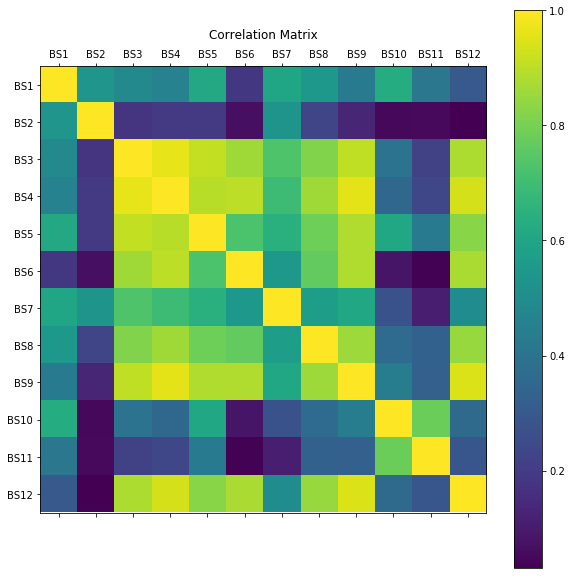

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
plt.matshow(MultiColumnData.corr())
plt.xticks(range(len(MultiColumnData.columns)), MultiColumnData.columns)
plt.yticks(range(len(MultiColumnData.columns)), MultiColumnData.columns)
plt.colorbar()

plt.title('Correlation Matrix')

plt.show()

In the plot above it is interesting to see that the BS3 to BS9 (except BS/) show much correlation in their readings for various compounds. This is also evident from the multi selection plot above, we can observe that BS7 is has some readings far above that of his neighbors.

This can help in building algorithm as we shall see later. Moreoever, during data collection we can raise doubt if those values reported by the sensors in this range show no correlation at all.

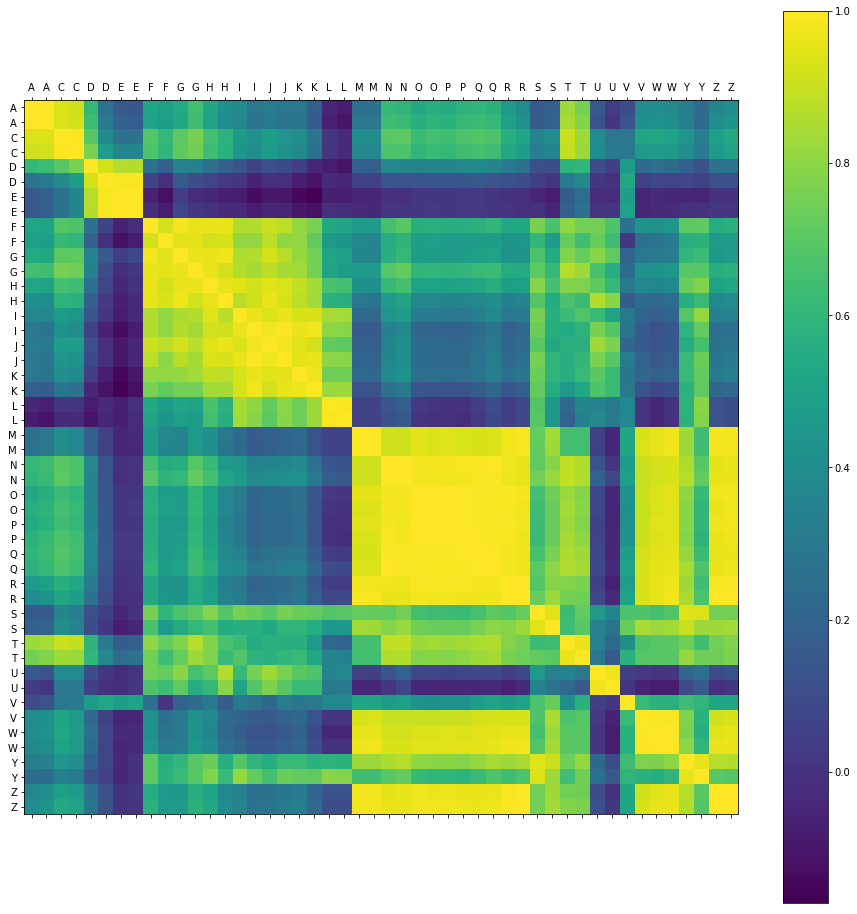

In [24]:
ColumnDataResetIndex =  OutputData.set_index(['Compounds']).T
from pylab import rcParams
rcParams['figure.figsize'] = 12, 18
plt.matshow(ColumnDataResetIndex.corr())
plt.xticks(range(len(ColumnDataResetIndex.columns)), ColumnDataResetIndex.columns)
plt.yticks(range(len(ColumnDataResetIndex.columns)), ColumnDataResetIndex.columns)
plt.colorbar()



plt.show()

In the plot above the axis was transposed so that the compounds become the columns. It is observed that correlation exist between certain compound measurement. In particular since we have 2 readings, There is correlation between a compound and the compound before it: since they are same compound. Aside this it is observed that for example compounds in range 22 to 33 show correlation in their readings. 

# Predictive Models

Scenario I (Ideal case):
<p> Suppose that are in an environment in which Compound B is a perpetual nuisance to the enviroment for example may be as a result of industrial activities. It is assumed that only compound B and not any other needs to be measured. Then in this case we select the BSX (where X is in range {1... 12} ) with the maximum sensor reading and use it for detetion of A. Moreover , it would be possible to select the best 4 (heuristically) and average the values out. If this is above a threshold then alarm would be raised </p>


<p>Scenario II (Real case): </p>
<p>Scenario I is an ideal case and might not be useful for mission critical applications.In typical environment, we have to deetct what compound it is from a range of possibilities. In such case one does not know apriori which compound it is likely to be. To this end, the input from the 12 sensors might be necessary, and we perform a simple Likelihood estimate while assuming a Gaussian model</p>

Assumptions:
<ol>
  <li>The variation in values for the 2 readings per compound for a particular sensor is due to Noise - a Gaussian noise in particular.</li>
  <li>This readings for different sensor are mutually exclusive.</li>
</ol>



## Simple Gaussian Model With Likehood Estimate

In [25]:
# this is what we are given 
df = ff.create_table(OutputData.head())
offline.iplot(df) # view data set to confirm changes has been made

In [26]:
# From the readings above we compute the mean and then the standard deviation.
# These are two 2 parameters needed to completely specify a Gaussian distribution

In [27]:
# set index to compound names 
GaussModelData = OutputData.set_index(['Compounds'])

In [28]:
# Below we compute the mean like so:
# for each row say A, we compute the average of the two values per sensor reading.
# This gives the mean that will be used in computing the likelihood
# The same processing is done for the standard deviation


# this variable stores the mean
means = [] 

# this variable stores the standard deviation
std = []

# this store prevents registering each row twice. 
store = []

for i in GaussModelData.index: # for each index. Index are the compound names 
    if i not in store:  # check if it is not in store
        t=GaussModelData.loc[i].std() # return rows with the index i and compute std. Pandas series is returned
        l = GaussModelData.loc[i].mean() # return rows with the index A and compute mean. Pandas series is returned
        means.append(l) # store pandas series
        store.append(i) # sore the indes ie compound names
        std.append(t)
        

DataMean = pd.concat(means, axis=1)
DataStd = pd.concat(std, axis=1)


In [29]:
DataMean.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
BS1,1165.0,2009.5,1071.0,1092.5,1057.0,906.0,1024.0,1530.0,1465.0,1656.5,...,2700.0,5146.0,4353.5,5305.0,1800.5,589.0,21146.5,10672.5,2767.0,2289.5
BS2,1431.5,2889.0,6727.0,11351.0,1257.0,1141.5,1105.5,1427.0,1360.5,1310.5,...,1638.5,2056.0,2430.0,3703.5,2246.0,607.0,13129.5,2067.0,1965.5,1876.5
BS3,842.0,1236.5,992.0,1014.5,1367.5,1075.0,1224.5,1613.5,1515.5,1523.0,...,1865.0,2089.0,2403.0,3566.0,1613.0,633.5,2635.0,2235.0,2506.5,2049.0
BS4,964.5,1333.0,974.5,1048.0,1418.0,1132.5,1042.5,1621.5,1398.5,1534.5,...,1794.5,2053.0,2241.5,3472.5,1688.0,576.0,2425.5,1944.5,1898.0,1710.0
BS5,1434.0,1265.0,1014.5,1244.0,1436.5,1162.5,1195.0,1790.0,1596.0,2131.5,...,2398.5,2526.0,3829.5,3666.5,2033.5,556.5,3577.0,3011.0,2402.5,2226.5


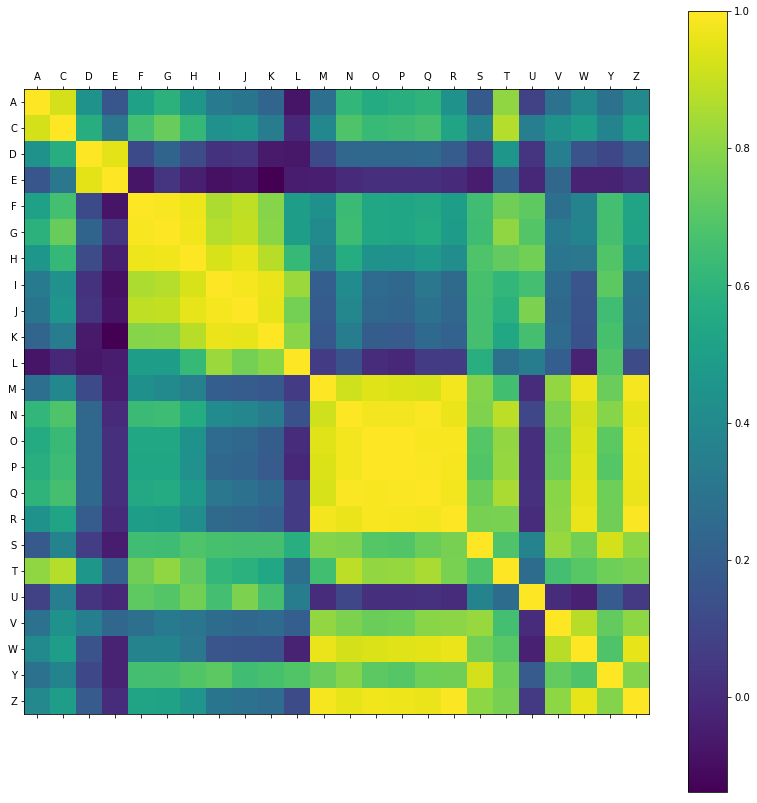

In [30]:
# As stated earlier we reploted the correlation matrix using the mean of 
# each pair of values 
# There are 24 values now and no duplicate 
DataMean.columns= store
DataStd.columns = store
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14
plt.matshow(DataMean.corr())
plt.xticks(range(len(DataMean.columns)), DataMean.columns)
plt.yticks(range(len(DataMean.columns)), DataMean.columns)
plt.colorbar()
plt.show()

In [31]:
# Parameeters for the model
# Transpose data set so that the BS1 to BS12 becomes column values
DataMean = DataMean.T
DataStd = DataStd.T

In [32]:
df = ff.create_table(DataMean.head())
offline.iplot(df) # view data set to confirm changes has been made

In [33]:
DataStd.head()

,BS1,BS2,BS3,BS4,BS5,BS6,BS7,BS8,BS9,BS10,BS11,BS12
A,39.597980,215.667568,138.592929,248.194480,193.747258,202.232539,62.225397,53.033009,6.363961,70.710678,468.104689,78.488853
C,293.449314,301.227489,3.535534,115.965512,66.468037,115.965512,114.551299,120.208153,17.677670,323.854906,441.234631,57.275649
D,60.811183,1889.389319,43.840620,0.707107,16.263456,0.707107,265.165043,130.814755,15.556349,175.362482,693.671752,102.530483
E,2.121320,1499.066376,68.589358,14.142136,5.656854,45.961941,257.386868,23.334524,30.405592,84.145707,443.355952,76.367532
F,265.872150,86.267027,150.613744,94.752309,290.620887,104.651804,180.312229,41.012193,48.083261,176.776695,74.246212,113.844192


Given an unknown test sample, $\mathcal{X}$, we can predict what compound it is using following approach
The Gaussain distribution is given as :

$$ P(\mathcal{X}\mid BS1, A) = \mathcal{N}(\mathcal{X} \mid   \mu_{bsi-A},\sigma_{bsi-A})  $$

$$ \mathcal{N}(\mathcal{X} \mid   \mu_{bsi-A},\sigma_{bsi-A})  = \frac{1}{\sqrt{2\pi\sigma_{bsi-A}^2} } e^{ -\frac{(x- \mu_{bsi-A})^2}{2\sigma_{bsi-A}^2} }$$

From the above discussion the probability of X will be product of $ P(\mathcal{X}\mid BS1, A) $ across all sesor readings for each class --- it is assumed readings are nutually exclusive. One then pick the compound having the highest likelihood. 

Thus we then have that:


$$  P(\mathcal{X} = \Psi ) = \prod_{i=1}^{n} \mathcal{N}(\mathcal{X}\mid \mu_i , \sigma_i)  $$

where :
        <p> n = 12 (the number of sensors BS1 to BS12) </p>
        $\Psi \in [A ... Z]$ = the set of possible compounds
         <p> The mean and std is for the particular sensor and particular compound as above </p>
         


Reference : <p> Machine Learning: A Probabilistic Perspective by Murphy </p>

<p> It should be noted that the above method could be replaced by Linear Discrimant analysis or Quadratic discriminant analysis. But due to very small data  set that is available, it is fine if we stick with this simple model. Later one hot encoding would be used for the classes then a kernel function function will be applied to make each class linear separable. Subsequently , we can then fit a Linear discrimim^nant function and verify how the model performs. Should there be availablereadings more , one hot encoding would likely be folloeed by deep net to give quite outstanding results</p>

# Normalization

<p> Normally, <b> Normalization</b> is sually the first step  most model building architecture. There are 2 prominent approaches <b> min-max scaling</b> and <b>scaling and centering </b>. Both approaches have been tested over and are robust. However <b>scaling and centering - z-score normalizing </b> is more robust to outliers. The  <b> min-max scaling</b> is given as : </p>
            $$ z_{i}^j  = \frac{x_i^j -min}{max-min}$$
<p> The   <b>scaling and centering </b> is given as : </p>
$$ z_{i}^j  = \frac{x_i^j - \mu_j}{\sigma_j}$$

<p> In addition using the min-max means we will have some data values zerorized since the min in always in the dataset and will subtract itself. Given we have little data , it is good we have all values represented, without having the minimum of each feature zerorized. </p>

<p> There are other robust scalers but for simplicity we have compared the two most used scalers  </p>

In [34]:
# Normalizing from Pandas 
NormalizedData = (MultiColumnData - MultiColumnData.mean()) / (MultiColumnData.std())

In [35]:
# View normalized data
NormalizedData.head()

,BS1,BS2,BS3,BS4,BS5,BS6,BS7,BS8,BS9,BS10,BS11,BS12
0,-0.506772,-0.410905,-1.306431,-1.286595,-0.828843,-0.421744,-0.666765,-1.038988,-1.076004,-0.675358,1.018722,-1.036340
1,-0.493944,-0.332103,-1.048673,-0.773698,-0.525382,-0.826873,-0.689452,-1.120101,-1.062512,-0.666329,0.830517,-0.827021
2,-0.259368,-0.049967,-0.662037,-0.611500,-0.812230,0.003217,-0.467222,1.192156,-0.306948,-0.575315,0.628666,-0.172664
3,-0.354435,0.060097,-0.655462,-0.371856,-0.916338,-0.229095,-0.508987,1.008300,-0.344426,-0.616668,0.451264,-0.325410
4,-0.512041,0.651497,-1.021056,-1.014803,-1.128982,-0.709301,-0.733795,-0.988157,-1.001047,-0.745967,-0.160261,-1.157028


In [36]:
# Using scikit learn for scaling
# THis solition is here so we could use it directls should
# we intend to use other scikit library
scaler = StandardScaler()
scaler.fit(MultiColumnData)
StandardScaler(copy=True, with_mean=True, with_std=True)
NormalizedScikit = scaler.transform(MultiColumnData)

In [37]:
NormalizedScikit[0] # view the first row

array([-0.51213481, -0.41525286, -1.32025555, -1.30020965, -0.8376144 ,
       -0.42620698, -0.67382055, -1.04998282, -1.08739035, -0.68250512,
        1.02950286, -1.04730673])

# Kernel Funtions and Other Classifier 

<p>Kernel methods owe their name to the use of <b>  kernel functions </b>, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. This approach is called the <b>  kernel trick.</b> </p>
<p>
Algorithms capable of operating with kernels include the kernel perceptron, support vector machines (SVM), Gaussian processes, principal components analysis (PCA), canonical correlation analysis, ridge regression, spectral clustering, linear adaptive filters and many others. Any linear model can be turned into a non-linear model by applying the "kernel trick" to the model: replacing its features (predictors) by a kernel function.
</p>

<p> source = {https://stats.stackexchange.com/questions/110347/when-do-kernel-based-method-perform-better-than-the-regular}</p>




This solution is an attempt to look for more robust predictive model given the available small data. 
<p>Steps: </p> 
<ol>
  <li>Use one hot encoding on the categories -- this becomes our target variable </li>
  <li>Use kernels to generate inferrred latent representation of the signal values and augment the signal values with this(We might also want to use <b> PCA </b> to do dimensionality reduction and compare results)</li>
   <li>We now have a target varaible and a feature set. We can LDA,Linear models or SVM  for prediction and training of samples  </li>
</ol>



### Simple SVM Model With Kernel

In [38]:
# set index to compound names 
KernelModel = OutputData.set_index(['Compounds'])

In [39]:
# use rbf and chi square kernel functions
KernelValues = rbf_kernel(NormalizedScikit, gamma=1.9) # rbfr kernel
LaplaceKernel = laplacian_kernel(NormalizedData.values, gamma=0.5) # chi square kernel
   
# Get the compound classes in a list. This is the target labels
Compounds = KernelModel.index.tolist()

# Verify shape of new data set
KernelValues.shape 

(48, 48)

In [40]:
# Split data set into trainign and test set for rbf 
x1,x2,y1,y2 = tts(KernelValues,Compounds, test_size=0.1) 

# Split data set into trainign and test set for chi square 
z1,z2,t1,t2 = tts(LaplaceKernel,Compounds, test_size=0.1) 


#### RBF Kernel

In [690]:

# fit model for rbf kernel
lin_clf = svm.LinearSVC()
lin_clf.fit(x1,y1 ) 

# view decision  function
dec = lin_clf.decision_function([x1[0]])
dec.shape[1]

24

In [675]:
# compute score on test set for rbf 
lin_clf.score(x2, y2) 

0.80000000000000004

#### Laplacian Kernel

In [708]:
# fit model for chi square  kernel
clf = svm.LinearSVC()
clf.fit(z1,t1 ) 

# view decision  function
dec = clf.decision_function([z1[0]])
dec.shape[1]

24

In [709]:
clf.score(z2, t2) # the result varies across different run

0.80000000000000004

In [41]:
### This section runs the SVM kernel across 30 iterations 
### each time choosing a random test set
## This is executed for both rbf and laplacian kernel
## The result will be plotted in a histogram


laplacianScore = []
rbfScore = []



for i in range(1,30):
    
    # k = np.random.choice(0, 2) this can be used to gammma parameters each time in a run.
    
    KernelValues = rbf_kernel(NormalizedScikit, gamma=1.9) # rbfr kernel
    LaplaceKernel = laplacian_kernel(NormalizedData.values, gamma=0.5) # chi square kernel
    
    # Split data set into trainign and test set for rbf 
    
    x1,x2,y1,y2 = tts(KernelValues,Compounds, test_size=0.1) 

    # Split data set into trainign and test set for chi square 
    z1,z2,t1,t2 = tts(LaplaceKernel,Compounds, test_size=0.1) 

   
    # Get the compound classes in a list. This is the target labels
    Compounds = KernelModel.index.tolist()


    ###### rbf kernel ###
    lin_clf = svm.LinearSVC()
    lin_clf.fit(x1,y1 ) 

    temp = lin_clf.score(x2, y2) 
    rbfScore.append(temp)


    ##### Laplacian ####
    # fit model for chi square  kernel
    clf = svm.LinearSVC()
    clf.fit(z1,t1 ) 

    temp2 = clf.score(z2, t2) # the result varies across different run
    laplacianScore.append(temp2)

    
    


In [42]:

N = 40
random_x = list(range(0, 30))

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = laplacianScore,
    mode = 'lines+markers',
    name = 'Laplacian_kernel + SVM'
)
trace1 = go.Scatter(
    x = random_x,
    y = rbfScore,
    mode = 'lines+markers',
    name = 'RBF_kernel + SVM'
)


layout = go.Layout(
    title = 'Test Score Plot',
    yaxis = dict(
    title = 'Score'
    ),
    xaxis = dict(
    title = 'Iteration'
    )
    
)


data = [trace0, trace1]
fig = go.Figure(data=data,layout =layout)

offline.iplot(fig)

 As the plot shows the model is far from being stable but it showcase the range of possibilities that can be exploited.An ensemble model using both methods above will be recommended especially in real application. In addition a parameter search using gradient and stochastic search will be necessary.

#  Statistical test

#### Chi Square test

In [43]:
from scipy.stats import chi2_contingency
ChiSquareResult= chi2_contingency(MultiColumnData.T)

In [44]:
# Below we compute the mean like so:
# for each row say A, we compute the average of the two values per sensor reading.
# This gives the mean that will be used in computing the likelihood
# The same processing is done for the standard deviation


# this variable stores the mean
means = [] 

# this variable stores the standard deviation
std = []

# this store prevents registering each row twice. 
store = []

for i in GaussModelData.index: # for each index. Index are the compound names 
    if i not in store:  # check if it is not in store
        l = GaussModelData.loc[i].iloc[0] # return rows with the index A and compute mean. Pandas series is returned
        means.append(l) # store pandas series
        store.append(i) # sore the indes ie compound names
Data = pd.concat(means, axis=1)
Data = Data.T

In [45]:
#import scipy, scipy.stats.chisquare


#observed_values= DataMean.Values
#expected_values=scipy.array([22,19,44,8,16])

chisquareresults = chisquare(Data, DataMean)

In [46]:
chisquareresults

Power_divergenceResult(statistic=array([  914.39200939,  9678.86218464,   236.85890144,   140.09252838,
         196.26142898,   156.24569517,  4923.45563231,   156.32226794,
         160.70103039,  2652.93717238,  1288.0072059 ,    50.41658378]), pvalue=array([  2.03196020e-178,   0.00000000e+000,   2.00669017e-037,
         8.90439192e-019,   1.85937988e-029,   8.55151248e-022,
         0.00000000e+000,   8.27213602e-022,   1.23306036e-022,
         0.00000000e+000,   5.46660895e-258,   8.12144273e-004]))

Given the results from p values from the test we can   we'd reject the null hypothesis that the the distributions are the same.

#### One Way Anova Test

In [47]:
C1 = GaussModelData.loc['A'].values.reshape(24,)
C2 = GaussModelData.loc['C'].values.reshape(24,)
C3 = GaussModelData.loc['D'].values.reshape(24,)
C4 = GaussModelData.loc['E'].values.reshape(24,)
C5 = GaussModelData.loc['F'].values.reshape(24,)
C6 = GaussModelData.loc['G'].values.reshape(24,)
C7 = GaussModelData.loc['H'].values.reshape(24,)
C8 = GaussModelData.loc['I'].values.reshape(24,)
C9 = GaussModelData.loc['J'].values.reshape(24,)
C10 = GaussModelData.loc['K'].values.reshape(24,)
C11 = GaussModelData.loc['L'].values.reshape(24,)
C12 = GaussModelData.loc['M'].values.reshape(24,)
C13 = GaussModelData.loc['N'].values.reshape(24,)
C14 = GaussModelData.loc['O'].values.reshape(24,)
C15 = GaussModelData.loc['P'].values.reshape(24,)
C17 = GaussModelData.loc['Q'].values.reshape(24,)
C18 = GaussModelData.loc['R'].values.reshape(24,)
C19= GaussModelData.loc['S'].values.reshape(24,)
C20 = GaussModelData.loc['T'].values.reshape(24,)
C21= GaussModelData.loc['U'].values.reshape(24,)
c22 = GaussModelData.loc['V'].values.reshape(24,)
C23 = GaussModelData.loc['W'].values.reshape(24,)
C25 = GaussModelData.loc['Y'].values.reshape(24,)
C26 = GaussModelData.loc['Z'].values.reshape(24,)


In [48]:
stats.f_oneway( C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13,C14,C15,C17,C18,C19,C20,C21)

F_onewayResult(statistic=3.9701879950770702, pvalue=1.2476324475359955e-07)

The one-way Anova test suggest that the Compound signal readings have different mean with about 99% confidence interval.
This mightbe used as an argument to support the simple gaussian model we first proposed

### Skewness Statistics



In [49]:
from scipy.stats import skew

In [50]:
# sekewness test for the sensor readings
# Shows the data set is considerably skewed
skew(MultiColumnData.values)

array([ 3.27838558,  4.04777078,  1.05371719,  1.11660733,  0.60663512,
        2.25329792,  2.63828624,  0.85195786,  1.02559497,  0.85555456,
        0.89288655,  1.03899606])

In [51]:
# sekewness test for the each compound values shows 
# considerable skewness values too.
skew(MultiColumnData.T.values)

array([ 2.47429093,  2.40276078,  1.52753028,  1.43178009,  1.42953052,
        2.29624296,  2.67255907,  2.63465717,  0.6795296 ,  0.25737767,
        0.66155847,  0.58590204,  0.80637712,  0.91685878,  1.56453809,
        1.44443967,  1.24343797,  1.4261418 ,  1.06570764,  1.50976268,
        2.86044395,  2.71057869,  2.91312635,  2.91118192,  2.14043558,
        2.08367893,  2.53360007,  2.46363084,  2.49740026,  2.39032349,
        2.28138627,  2.23986993,  2.67048381,  2.77021665,  1.40763531,
        1.38974613,  1.18008622,  0.92218634,  2.03469472,  2.41354968,
        0.65812015,  2.08362238,  2.35156655,  2.48743372,  1.76954961,
        1.76806175,  2.76588911,  2.65938309])

# Conclusion


This concludes the solution to question 2. Many possibile pathways have been investigated. But further investigations are still possible, especially using PCA with the output from the kernel or on the data directly.